https://oj.rnd.huawei.com/problems/1835/details

某程序需要计算复杂的表达式，该表达式全部由双目运算组成，可以用二叉树来表示整个计算过程：所有叶子节点是操作数，非叶子节点是运算符。比如：(1 * 2) + (60 / 3) 可以用下面的二叉树来表示：

- 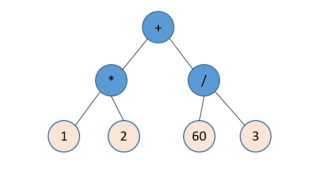

- 为了充分利用CPU的多核能力，在计算表达式时尽量让一些步骤并行计算。比如对于上面的表达式，如果使用的CPU核数大于等于2，就可以让 1 * 2 和 60 / 3 并行计算。
- 运算符节点运算之后变为操作数，才能参与下一次运算。例如图中 * 变成 2， / 变成 20，然后才能运算 2 + 20。
- 假设一次双目运算需要 1 个时间周期。
给定表达式的结构以及CPU的核数量，请输出完成该表达式计算最少需要多少个时间周期。

### 解答要求
时间限制：1000ms, 内存限制：256MB
### 输入
第一行一个整数 coreCount，表示CPU的核数，1 <= coreCount <= 64
第二行一个整数 nodeNum，表示层序方式表示的二叉树的节点的个数，3 <= nodeNum <= 10000
第三行是 nodeNum 个整数，表示二叉树的各节点：

首个值（值为0）是根节点。
1 表示叶子节点（代表操作数），0 表示非叶子节点（代表运算符）
-1 表示空节点，不是树上的有效节点，且它的子节点不再给出。
用例保证输入可构造出合法的二叉树

### 输出
一个整数，表示计算完该表达式最少需要多少个时间周期

### 样例
输入样例 1 复制
```
3
7
0 0 0 1 1 1 1
```
输出样例 1

2
提示样例 1
该数据所描述的二叉树结构，与题中图示相同（蓝色节点为运算符，黄色节点为操作数）。最少需要2个周期，运算过程如下：

第1个周期：第二层的两个运算，可利用两个CPU核并行运算。第1个周期结束后，第二层的两个运算符变为操作数。
第2个周期：可利用三个CPU核中的一个，进行第一层的运算。


输入样例 2 复制
```
2
25
0 0 0 0 1 0 0 1 1 -1 -1 1 1 0 1 -1 -1 -1 -1 -1 -1 -1 -1 1 1
```
输出样例 2

4
提示样例 2
输入数据所表示的计算表达式二叉树结构如下图（蓝色节点为运算符，黄色节点为操作数）：

- 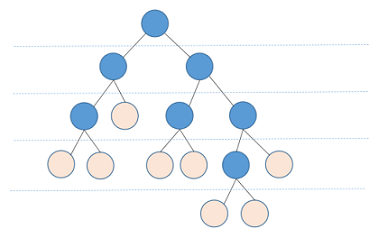
最少需要 4 个周期完成所有运算

In [163]:
from typing import List


class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class Solution:
    def __init__(self):
        self.root = None
        self.count = 0
        self.result = []

    def Tree(self, nodes: List[int]):
        nodes = [Node(x) for x in nodes]
        self.root = nodes.pop(0)
        temp = [self.root]
        while temp:
            for _ in range(len(temp)):
                node = temp.pop(0)
                if nodes:
                    left = nodes.pop(0)
                    if left.value != -1:
                        node.left = left
                        temp.append(left)
                if nodes:
                    right = nodes.pop(0)
                    if right.value != -1:
                        node.right = right
                        temp.append(right)

    def calculate(self, node: Node):
        if node:
            if node.left and node.right and node.left.value == 1 and node.right.value == 1:
                node.value = 1
                node.left = None
                node.right = None
                self.count += 1
            if node.left:
                self.calculate(node.left)
            if node.right:
                self.calculate(node.right)

    def get_cycle_count(self, core_count: int, nodes: List[int]) -> int:
        # 在此添加你的代码
        self.Tree(nodes)
        count = 0
        while self.root.value == 0:
            self.calculate(self.root)
            self.result.append(self.count)
            if self.count % core_count:
                count += self.count // core_count + 1
            else:
                count += self.count // core_count
            self.count = 0
        return count

In [164]:
core_count = 25
nodes = [0, 0, 0, 0, 1, 0, 0, 1, 1, -1, -1, 1, 1, 0, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1]

In [165]:
core_count = 3
nodes = [0, 0, 0, 1, 1, 1, 1]

In [166]:
sol = Solution()
sol.get_cycle_count(core_count, nodes)

2

In [167]:
sol.result

[2, 1]